In [35]:
%matplotlib inline
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import api_import 
import simplejson as json

#LOAD DATA

In [36]:
#Load master dataframe
df = pd.read_json("../data/census_zillow_subway_yelp_data.json")
df.set_index(['COUNTY_ID', 'TRACT_ID'],inplace=True,drop=True)
df.columns

Index([u'ALAND', u'ALAND_SQMI', u'AWATER', u'AWATER_SQMI', u'BOROUGH', u'FRAC_LAND', u'GEOID', u'INTPTLAT', u'INTPTLONG', u'LATMAX', u'LATMIN', u'LONGMAX', u'LONGMIN', u'STATE', u'STATE_ID', u'STATION', u'STATION_DISTANCE', u'USPS', u'ZIPCODE', u'average_rating_restaurants_chinese', u'average_rating_restaurants_cuban', u'average_rating_restaurants_greek', u'average_rating_restaurants_indpak', u'average_rating_restaurants_italian', u'average_rating_restaurants_japanese', u'average_rating_restaurants_latin', u'average_rating_restaurants_mexican', u'average_rating_restaurants_newamerican', u'average_rating_restaurants_puertorican', u'average_rating_restaurants_tradamerican', u'average_rating_restaurants_vegetarian', u'closed_number_restaurants_chinese', u'closed_number_restaurants_cuban', u'closed_number_restaurants_greek', u'closed_number_restaurants_indpak', u'closed_number_restaurants_italian', u'closed_number_restaurants_japanese', u'closed_number_restaurants_latin', u'closed_number_r

In [37]:
def first_element(x):
    return x.iloc[0]
dfzip = df.groupby('ZIPCODE').apply(sum)
dfzip2 = df.groupby('ZIPCODE').apply(np.mean)
dfzip3 = df.groupby('ZIPCODE').apply(first_element)
dfzip['FRAC_LAND'] = dfzip['ALAND'] / (dfzip['ALAND'] + dfzip['AWATER'])
dfzip['INTPTLAT'] = dfzip2['INTPTLAT']
dfzip['INTPTLONG'] = dfzip2['INTPTLONG']
dfzip['fraction_latino'] = dfzip['pop_latino']/dfzip['pop_total']
dfzip['fraction_asian'] = dfzip['pop_asian']/dfzip['pop_total']
dfzip['fraction_white'] = dfzip['pop_white']/dfzip['pop_total']
dfzip['fraction_black'] = dfzip['pop_black']/dfzip['pop_total']
dfzip['pop_density'] = dfzip['transient_residential_pop'] / dfzip['ALAND']
dfzip['hhmean'] = dfzip2['hhmean']
dfzip['hhmedian'] = dfzip2['hhmedian']
dfzip['house_median'] = dfzip2['house_median']
dfzip['house_index'] = dfzip2['house_index']
dfzip['median_owned'] = dfzip2['median_owned']
dfzip['median_rent'] = dfzip2['median_rent']
dfzip['BOROUGH'] = dfzip3['BOROUGH']
dftract = df.copy()
del df
dfzip = dfzip.drop(0,axis=0)
df = dfzip
df.head()

,ALAND,ALAND_SQMI,AWATER,AWATER_SQMI,BOROUGH,FRAC_LAND,GEOID,INTPTLAT,INTPTLONG,LATMAX,...,unweighed_average_rating_restaurants_puertorican,unweighed_average_rating_restaurants_tradamerican,unweighed_average_rating_restaurants_vegetarian,zillow_house_index,zillow_house_median,fraction_latino,fraction_asian,fraction_white,fraction_black,pop_density
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
10001,346238,0.133,0,0.000,Manhattan,1.000000,72122017100,40.747402,-73.990328,81.498550,...,NaN,6.671429,8.250000,0,0,0.042111,0.265458,0.660092,0.032161,0.043566
10002,2063151,0.797,1249217,0.482,Manhattan,0.622863,468793019212,40.715444,-73.984217,529.328659,...,NaN,22.375000,8.000000,0,0,0.287305,0.387337,0.345783,0.080577,0.056028
10003,1097625,0.424,0,0.000,Manhattan,1.000000,288488038102,40.730343,-73.989634,325.855934,...,NaN,28.351190,26.233333,0,0,0.076578,0.139669,0.760993,0.048017,0.096014
10004,900201,0.347,3296589,1.273,Manhattan,0.214498,72122000600,40.690181,-74.032017,81.390762,...,NaN,6.000000,NaN,0,0,NaN,NaN,NaN,NaN,0.000000
10005,336658,0.130,422042,0.163,Manhattan,0.443730,36061000900,40.698676,-74.006157,40.702598,...,NaN,NaN,NaN,0,0,0.118421,0.070175,0.801754,0.022807,0.043876


#ADD ADDITIONAL FEATURES

In [38]:
#Add additional test features
df['fraction_asian'] = (df['pop_asian'] / df['pop_total'])
df['fraction_latino'] = (df['pop_latino'] / df['pop_total'])
df['fraction_white'] = (df['pop_white'] / df['pop_total'])
df['fraction_black'] = (df['pop_black'] / df['pop_total'])
df['pop_density'] = df['transient_residential_pop'] / df['ALAND']
df['number_restaurants'] = df['number_restaurants_chinese'] + df['number_restaurants_cuban'] + \
df['number_restaurants_greek'] + df['number_restaurants_indpak'] + df['number_restaurants_italian'] + \
df['number_restaurants_japanese'] + df['number_restaurants_latin'] + df['number_restaurants_mexican'] + \
df['number_restaurants_newamerican'] + df['number_restaurants_puertorican'] + df['number_restaurants_tradamerican'] + \
df['number_restaurants_vegetarian']
df['number_restaurants_capita'] = 10000.0 * (df['number_restaurants'] / df['transient_residential_pop']).replace([np.inf,-np.inf,np.nan],0.0)
df['number_restaurants_capita_chinese'] = 10000.0 * (df['number_restaurants_chinese'] / df['transient_residential_pop']).replace([np.inf,-np.inf,np.nan],0.0) 
df['number_restaurants_capita_mexican'] = 10000.0 * (df['number_restaurants_mexican'] / df['transient_residential_pop']).replace([np.inf,-np.inf,np.nan],0.0)  

In [39]:
#Add additional test features
dftract['fraction_asian'] = (dftract['pop_asian'] / dftract['pop_total'])
dftract['fraction_latino'] = (dftract['pop_latino'] / dftract['pop_total'])
dftract['fraction_white'] = (dftract['pop_white'] / dftract['pop_total'])
dftract['fraction_black'] = (dftract['pop_black'] / dftract['pop_total'])
dftract['pop_density'] = dftract['transient_residential_pop'] / dftract['ALAND']
dftract['number_restaurants'] = dftract['number_restaurants_chinese'] + dftract['number_restaurants_cuban'] + \
dftract['number_restaurants_greek'] + dftract['number_restaurants_indpak'] + dftract['number_restaurants_italian'] + \
dftract['number_restaurants_japanese'] + dftract['number_restaurants_latin'] + dftract['number_restaurants_mexican'] + \
dftract['number_restaurants_newamerican'] + dftract['number_restaurants_puertorican'] + dftract['number_restaurants_tradamerican'] + \
dftract['number_restaurants_vegetarian']
dftract['number_restaurants_capita'] = 10000. * (dftract['number_restaurants'] / dftract['transient_residential_pop']).replace([np.inf,-np.inf,np.nan],0.0)
dftract['number_restaurants_capita_chinese'] = 10000. * (dftract['number_restaurants_chinese'] / dftract['transient_residential_pop']).replace([np.inf,-np.inf,np.nan],0.0)
dftract['number_restaurants_capita_mexican'] = 10000. * (dftract['number_restaurants_mexican'] / dftract['transient_residential_pop']).replace([np.inf,-np.inf,np.nan],0.0)  

In [40]:
df['number_restaurants_capita_mexican']

ZIPCODE
10001     5.303583
10002     1.297645
10003     3.131314
10004     0.000000
10005     0.676989
10007     8.629510
10009     2.100126
10010     1.645959
10011     2.408053
10012     3.489763
10013     3.307792
10014     3.474961
10016     2.689858
10017     1.657577
10018     2.165190
10019     1.528534
10021     0.346366
10022     1.488214
10023     0.875750
10024     0.752380
10025     1.069746
10026     0.334799
10027     0.282239
10028     0.920036
10029     3.242180
10030     0.000000
10031     0.504382
10032     1.537314
10033     0.491089
10034     2.490489
           ...    
11412     0.000000
11413     0.000000
11414     0.000000
11415     0.000000
11416     0.000000
11417     0.000000
11418     0.000000
11419     0.000000
11420     0.000000
11421     0.812599
11422     0.236010
11423     0.000000
11424     0.000000
11425     0.000000
11426     0.444879
11427     0.000000
11428     0.286681
11429     0.000000
11430    56.710775
11432     0.363012
11433     0.724718
1143

(0, 60)

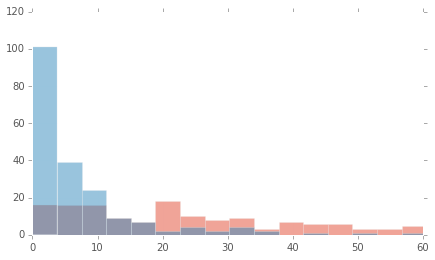

In [41]:
mpl.rcParams['figure.figsize'] = (7,4)
n, bins, patches = plt.hist(np.array(df['number_restaurants']),bins=100,alpha=0.5);
plt.hist(np.array(df['number_restaurants_mexican']),bins=bins,alpha=0.5);
plt.xlim([0,60])
#df['number_restaurants_capita_chinese']

In [42]:
#Check that all features are available
df.head(3)

,ALAND,ALAND_SQMI,AWATER,AWATER_SQMI,BOROUGH,FRAC_LAND,GEOID,INTPTLAT,INTPTLONG,LATMAX,...,zillow_house_median,fraction_latino,fraction_asian,fraction_white,fraction_black,pop_density,number_restaurants,number_restaurants_capita,number_restaurants_capita_chinese,number_restaurants_capita_mexican
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
10001,346238,0.133,0,0.000,Manhattan,1.000000,72122017100,40.747402,-73.990328,81.498550,...,0,0.042111,0.265458,0.660092,0.032161,0.043566,76,50.384036,4.640635,5.303583
10002,2063151,0.797,1249217,0.482,Manhattan,0.622863,468793019212,40.715444,-73.984217,529.328659,...,0,0.287305,0.387337,0.345783,0.080577,0.056028,172,14.879661,3.892935,1.297645
10003,1097625,0.424,0,0.000,Manhattan,1.000000,288488038102,40.730343,-73.989634,325.855934,...,0,0.076578,0.139669,0.760993,0.048017,0.096014,268,25.430067,1.613101,3.131314


#Load yelp api dataframe

In [43]:
yelp = pd.read_json("../data/yelp/yelp_api_data.json")
with open("../data/yelp/yelp_api_data.json") as fp:
    json1_str = fp.read() 
    yelp = json.loads(json1_str)

In [44]:
cuisine_types = yelp.keys()
cuisine_types

['puertorican',
 'cuban',
 'latin',
 'mexican',
 'chinese',
 'vegetarian',
 'indpak',
 'japanese',
 'greek',
 'tradamerican',
 'newamerican',
 'italian']

##Restrict analysis to subset of data
<li>Chinese restaurants</li>
<li>Census tracts where number of restaurants is != 0</li>
<li>Census tracts where fraction of land mass > 0.8</li>
<strong>Rationale: Areas with NO restaurants at all may be zoned completely residential. While lacking access to zoning data, this is best heuristic.</strong>

In [90]:
dfsub = df.loc[(df['FRAC_LAND'] > 0.5) & (df['number_restaurants_chinese'] >= 0.0),:]
print len(dfsub)," rows after clearing census tracts partially under water"
dfsub = df.loc[(df['FRAC_LAND'] > 0.5) & (df['number_restaurants'] > 0.0),:]
dfsub2 = df.loc[(df['FRAC_LAND'] > 0.5) & (df['number_restaurants_chinese'] > 0.0),:]
print len(dfsub)," rows after clearing census tracts without any restaurants"
dfsub.head(5)
mask = (df['FRAC_LAND'] > 0.5) & (df['number_restaurants_chinese'] >= 0.0)
mask.unique()

183  rows after clearing census tracts partially under water
179  rows after clearing census tracts without any restaurants


array([True, False], dtype=object)

###Cuisine Type = Chinese

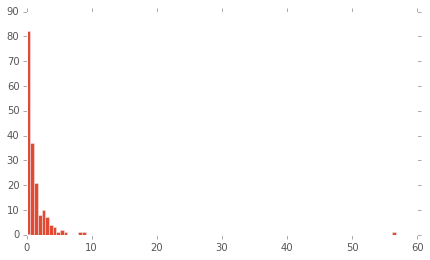

In [46]:
mpl.rcParams['figure.figsize'] = (7,4)
dfsub['number_restaurants_capita_mexican'].hist(bins=100)
#dfsub.columns

In [47]:
dfsub[dfsub['number_restaurants_capita_mexican'] > 1.0]

,ALAND,ALAND_SQMI,AWATER,AWATER_SQMI,BOROUGH,FRAC_LAND,GEOID,INTPTLAT,INTPTLONG,LATMAX,...,zillow_house_median,fraction_latino,fraction_asian,fraction_white,fraction_black,pop_density,number_restaurants,number_restaurants_capita,number_restaurants_capita_chinese,number_restaurants_capita_mexican
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
10001,346238,0.133,0,0.000,Manhattan,1.000000,72122017100,40.747402,-73.990328,81.498550,...,0,0.042111,0.265458,0.660092,0.032161,0.043566,76,50.384036,4.640635,5.303583
10002,2063151,0.797,1249217,0.482,Manhattan,0.622863,468793019212,40.715444,-73.984217,529.328659,...,0,0.287305,0.387337,0.345783,0.080577,0.056028,172,14.879661,3.892935,1.297645
10003,1097625,0.424,0,0.000,Manhattan,1.000000,288488038102,40.730343,-73.989634,325.855934,...,0,0.076578,0.139669,0.760993,0.048017,0.096014,268,25.430067,1.613101,3.131314
10007,312722,0.121,0,0.000,Manhattan,1.000000,36061001300,40.709109,-74.012980,40.711627,...,0,0.091367,0.163930,0.742055,0.044756,0.018528,31,53.502965,10.355413,8.629510
10009,1625274,0.627,1072262,0.414,Manhattan,0.602503,360610028607,40.724099,-73.977759,407.262230,...,0,0.257295,0.153121,0.593852,0.073497,0.046876,131,17.194780,1.050063,2.100126
10010,811896,0.314,309253,0.119,Manhattan,0.724164,180305028400,40.736977,-73.983480,203.695318,...,0,0.061529,0.144889,0.765333,0.024960,0.112246,134,14.703900,0.987575,1.645959
10011,1209654,0.467,0,0.000,Manhattan,1.000000,252427055800,40.741678,-73.997865,285.204850,...,0,0.129654,0.082395,0.779576,0.056137,0.061794,136,18.194177,1.739149,2.408053
10012,797623,0.309,0,0.000,Manhattan,1.000000,180305026703,40.726450,-73.997296,203.641176,...,0,0.056861,0.119283,0.795922,0.023753,0.075444,184,30.576974,0.830896,3.489763
10013,1134348,0.439,447417,0.173,Manhattan,0.717141,180305020500,40.720302,-74.003473,203.613373,...,0,0.056501,0.292259,0.626061,0.016317,0.026651,196,64.832732,8.600260,3.307792


In [48]:
cuisine_type = "mexican"

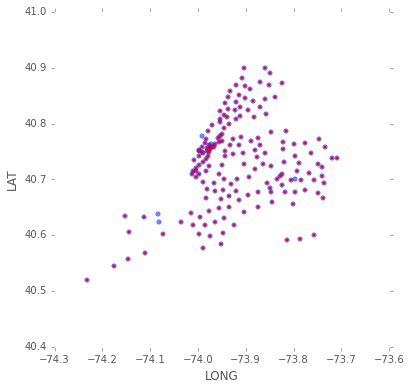

In [49]:
mpl.rcParams["figure.figsize"] = (6,6)
plt.scatter(dfsub["INTPTLONG"],dfsub["INTPTLAT"],s=20,color="blue",alpha=0.5)
plt.scatter(dfsub2["INTPTLONG"],dfsub2["INTPTLAT"],s=5,color="red")
plt.xlabel("LONG"); plt.ylabel("LAT")

#Linear Model - Feature Selection

In [50]:
pred_features = ['pop_density','STATION_DISTANCE','hhmedian','median_owned','median_rent','pop_asian','pop_black','pop_indpak','pop_latino','pop_total','pop_white','transient_pop','transient_residential_pop','fraction_asian','fraction_latino']

In [51]:
nfeatures = len(pred_features)
print plt.style.available
plt.style.use('ggplot')

[u'dark_background', u'bmh', u'grayscale', u'ggplot', u'fivethirtyeight']


In [52]:
import matplotlib.gridspec as gridspec
def create_feature_matrix(dataframe,feature_list,feature_cuisine,single_feature=False):

    np.set_printoptions(precision=8)
    
    #get size of matrix
    ncols = len(feature_list)
    nrows = len(dataframe)
        
    if single_feature == True:
        X_ = np.array(dataframe[feature_list].astype('float'))
        X_ = X_[:,np.newaxis]
    else:
        X = []
        for feature in feature_list:
            A = np.array(dataframe[feature].astype('float'))
            X.append(A)    
        X_ = np.vstack(X).T
    
    Y = np.array(dataframe[feature_cuisine].astype('float'))
    Y = Y[:,np.newaxis]
    X_ = np.nan_to_num(X_)
    
    return np.matrix(X_), np.matrix(Y)

###Number of Mexican Restaurants as a function of each Feature

pop_density         : 0.0357
STATION_DISTANCE    : 0.0218
hhmedian            : 0.0005
median_owned        : 0.0690
median_rent         : 0.0130
pop_asian           : 0.0797
pop_black           : 0.0099
pop_indpak          : 0.0028
pop_latino          : 0.1263
pop_total           : 0.1364
pop_white           : 0.1876
transient_pop       : 0.3653
transient_residential_pop: 0.3151
fraction_asian      : 0.0004
fraction_latino     : 0.0357


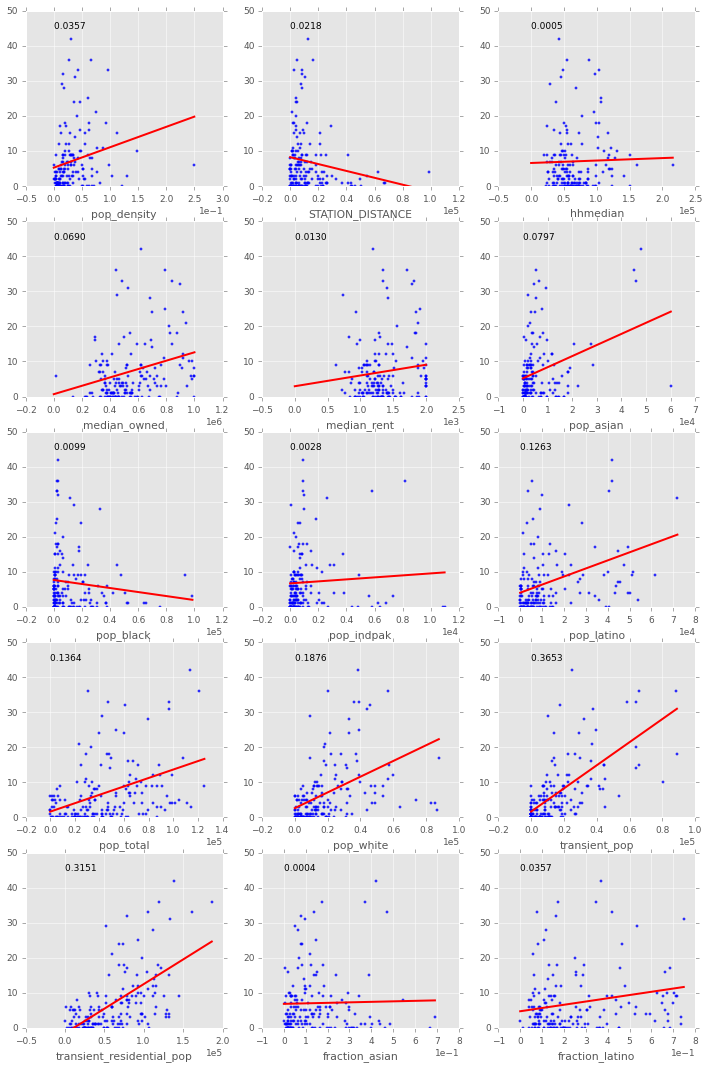

In [53]:
from sklearn import linear_model
from sklearn.metrics import explained_variance_score

mpl.rcParams["font.size"] = 9
mpl.rcParams["figure.figsize"] = (12,22)
gs = gridspec.GridSpec(6, 3)
fig = plt.figure()
for i,feature in enumerate(pred_features):
    ax = fig.add_subplot(gs[i])
    feature_cuisine = "number_restaurants_"+cuisine_type
    ax.scatter(dfsub[feature],dfsub[feature_cuisine],s=5,alpha=0.8,color="blue")
    ax.set_xlabel(feature)
    ax.set_ylim([0,50])
    ax.ticklabel_format(axis="x",style = 'sci', scilimits=(-1,1)) 

    X_, y_ = create_feature_matrix(dfsub,feature,feature_cuisine,single_feature=True)

    clf = linear_model.LinearRegression()
    clf.fit(X_,y_)
    R2 = clf.score(X_,y_)
    
    #plot best-fit line 
    xline = np.linspace(X_.min(),X_.max(),100)
    yline = clf.predict(xline[:,np.newaxis])
    
    ax.plot(xline,yline,color='red',ls='-',lw=2)
    
    ax.text(X_.min(),45,"{0:<7.4f}".format(R2))

    #EVS = explained_variance_score(y_, clf.predict(X_))
    
    print "{0:20s}: {1:<6.4f}".format(feature, R2)

pop_density         : 0.0000
STATION_DISTANCE    : 0.0144
hhmedian            : 0.0068
median_owned        : 0.0113
median_rent         : 0.0143
pop_asian           : 0.0031
pop_black           : 0.0153
pop_indpak          : 0.0066
pop_latino          : 0.0029
pop_total           : 0.0208
pop_white           : 0.0032
transient_pop       : 0.0000
transient_residential_pop: 0.0119
fraction_asian      : 0.0023
fraction_latino     : 0.0096


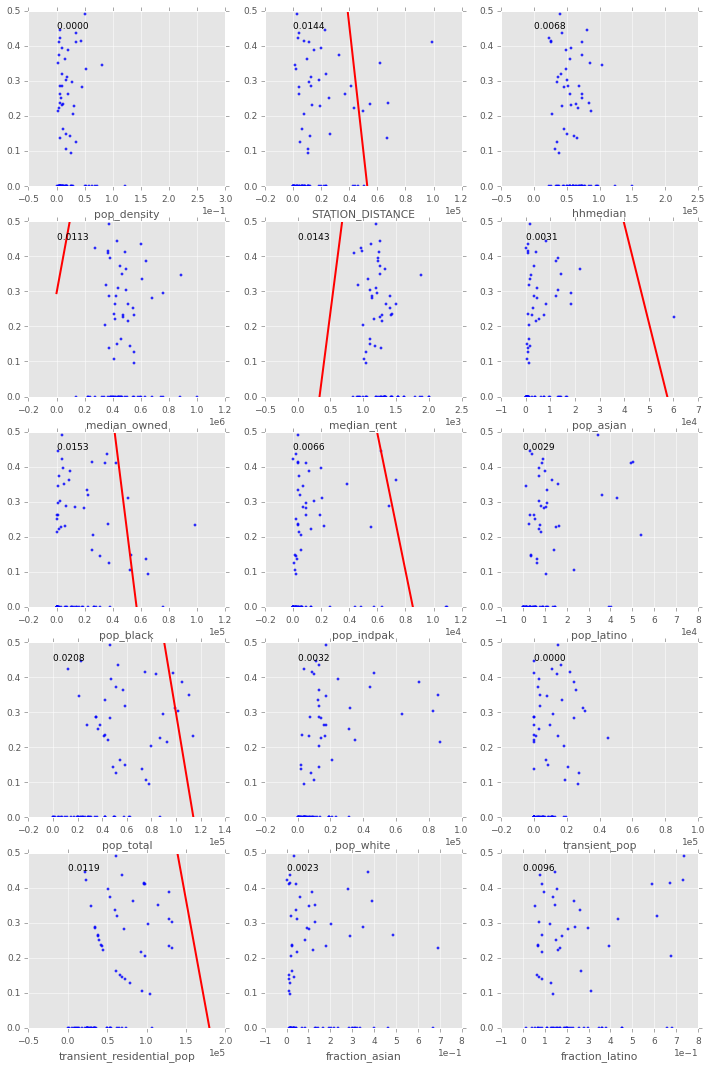

In [54]:
mpl.rcParams["font.size"] = 9
mpl.rcParams["figure.figsize"] = (12,22)
gs = gridspec.GridSpec(6, 3)
fig = plt.figure()
for i,feature in enumerate(pred_features):
    ax = fig.add_subplot(gs[i])
    feature_cuisine = "number_restaurants_capita_"+cuisine_type
    ax.scatter(dfsub[feature],dfsub[feature_cuisine],s=5,alpha=0.8,color="blue")
    ax.set_xlabel(feature)
    ax.set_ylim([0,0.5])
    ax.ticklabel_format(axis="x",style = 'sci', scilimits=(-1,1))
    
    X_, y_ = create_feature_matrix(dfsub,feature,feature_cuisine,single_feature=True)

    clf = linear_model.LinearRegression()
    clf.fit(X_,y_)
    R2 = clf.score(X_,y_)
    
    #plot best-fit line 
    xline = np.linspace(X_.min(),X_.max(),100)
    yline = clf.predict(xline[:,np.newaxis])
    
    ax.plot(xline,yline,color='red',ls='-',lw=2)
    ax.text(0,0.45,"{0:<7.4f}".format(R2))

    #EVS = explained_variance_score(y_, clf.predict(X_))
    
    print "{0:20s}: {1:<6.4f}".format(feature, R2)

#Linear Regression, All Features

In [55]:
from sklearn import linear_model
from sklearn.metrics import explained_variance_score
pred_features = ['pop_density','STATION_DISTANCE','hhmedian','median_owned',
                 'median_rent','pop_asian','pop_black','pop_indpak',
                 'pop_latino','pop_total','pop_white','transient_pop',
                 'transient_residential_pop','fraction_asian','fraction_latino']
#pred_features = ['transient_residential_pop','pop_asian','pop_chinese']
feature_cuisine = "number_restaurants_"+cuisine_type
X_, y_ = create_feature_matrix(dfsub,pred_features,feature_cuisine,single_feature=False)

In [56]:
from sklearn import metrics
clf_linear = linear_model.LinearRegression()
clf_linear.fit(X_,y_)
R2_linear = clf_linear.score(X_,y_)
print "Linear Regression R^2 = ",R2_linear
yfit_linear = clf_linear.predict(X_)
#print "MSE = ",metrics.mean_squared_error(y_,clf.predict(X_))
from sklearn.metrics import mean_squared_error
print np.sqrt(mean_squared_error(y_,yfit_linear))

Linear Regression R^2 =  0.545136869074
6.57736043069


#Lasso Regression

In [57]:
for alpha in np.logspace(-6,0.5,5):
    clf_lasso = linear_model.Lasso(alpha=alpha)
    clf_lasso.fit(X_,y_)
    R2_lasso = clf_lasso.score(X_,y_)
    print "Lasso Regression R^2 = ",R2_lasso," ,alpha = ",alpha

Lasso Regression R^2 =  0.545136869036  ,alpha =  1e-06
Lasso Regression R^2 =  0.545136801716  ,alpha =  4.21696503429e-05
Lasso Regression R^2 =  0.545017088795  ,alpha =  0.00177827941004
Lasso Regression R^2 =  0.521300012949  ,alpha =  0.0749894209332
Lasso Regression R^2 =  0.521295254979  ,alpha =  3.16227766017


In [58]:
yfit_lasso = clf_lasso.fit(X_,y_)

#Ridge Regression

In [59]:
for alpha in np.logspace(-6,0.5,5):
    clf_ridge = linear_model.Ridge(alpha=alpha)
    clf_ridge.fit(X_,y_)
    R2_ridge = clf_ridge.score(X_,y_)
    print "Ridge Regression R^2 = ",R2_ridge," ,alpha = ",alpha

Ridge Regression R^2 =  0.545136869068  ,alpha =  1e-06
Ridge Regression R^2 =  0.545136859056  ,alpha =  4.21696503429e-05
Ridge Regression R^2 =  0.545120014505  ,alpha =  0.00177827941004
Ridge Regression R^2 =  0.538659635967  ,alpha =  0.0749894209332
Ridge Regression R^2 =  0.52298207391  ,alpha =  3.16227766017


In [60]:
mpl.rcParams['figure.figsize'] = (8,4)
yfit_ridge = clf_ridge.fit(X_,y_)

#Lasso Lars Regression: Best if alpha->0 ie regular Linear Regression

In [61]:
clf_lassolars = linear_model.LassoLars(alpha=0.1,verbose=True)
clf_lassolars.fit(X_,y_)
R2_lassolars = clf_lassolars.score(X_,y_)
yfit_lassolars = clf_lassolars.predict(X_)
print "Lasso Lars Regression R^2 = ",R2_lassolars  #highest R2 when alpha->0

Lasso Lars Regression R^2 =  0.441805737457


##Deviation between Prediction and Data

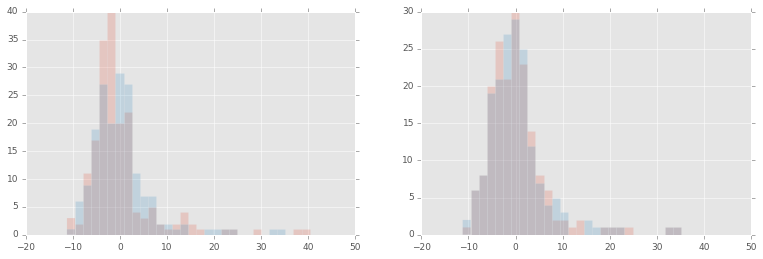

In [62]:
mpl.rcParams['figure.figsize'] = (13,4)
yfit_linear = np.ravel(clf_linear.predict(X_))
yfit_lasso = np.ravel(clf_lasso.predict(X_))
yfit_ridge = np.ravel(clf_ridge.predict(X_))
fig = plt.figure()
ax1 = fig.add_subplot(121)
n, bins, patches = ax1.hist(np.ravel(y_)-yfit_lassolars,bins=30,alpha=0.2);
ax1.hist(np.ravel(y_)-yfit_ridge,bins=bins,alpha=0.2);
ax2 = fig.add_subplot(122)
ax2.hist(np.ravel(y_)-yfit_lasso,bins=bins,alpha=0.2);
ax2.hist(np.ravel(y_)-yfit_linear,bins=bins,alpha=0.2);

In [63]:
dx_linear = np.ravel(y_)-yfit_linear
dx_lasso = np.ravel(y_)-yfit_lasso
dx_ridge = np.ravel(y_)-yfit_ridge
dx_lassolars = np.ravel(y_)-yfit_lassolars

In [64]:
stddev_linear = np.std(dx_linear)
stddev_lasso = np.std(dx_lasso)
stddev_ridge = np.std(dx_ridge)
stddev_lassolars = np.std(dx_lassolars)

In [65]:
print stddev_linear
print stddev_lasso
print stddev_ridge
print stddev_lassolars

6.57736043069
6.74753489578
6.73563621081
7.28624813566


In [66]:
len(yfit_linear), len(dfsub)

(179, 179)

## Random Forest

In [67]:
#Random Forest and Ensemble Classifiers
from sklearn import ensemble

In [68]:
clf_rf = ensemble.RandomForestRegressor(n_estimators=10,max_depth=7,verbose=1)
clf_rf.fit(X_,np.ravel(np.array(y_)))
yfit_rf = clf_rf.predict(X_)
R2_rf = clf_rf.score(X_,np.ravel(np.array(y_)))
print "R2 Random Forest = ",R2_rf

R2 Random Forest =  0.889066850098


[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [69]:
#How does R2 change with max depth?
max_depth_list = np.arange(15) + 1
R2_rf_list = []
for depth in max_depth_list:
    clf_rf_tmp = ensemble.RandomForestRegressor(n_estimators=10,max_depth=depth,verbose=1)
    clf_rf_tmp.fit(X_,np.ravel(np.array(y_)))
    yfit_rf_tmp = clf_rf_tmp.predict(X_)
    R2_rf_list.append(clf_rf_tmp.score(X_,np.ravel(np.array(y_))))

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: 

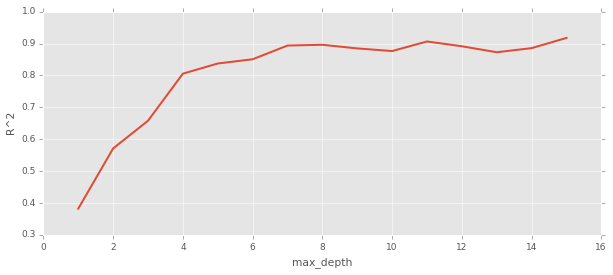

In [70]:
mpl.rcParams["figure.figsize"] = (10,4)
plt.plot(max_depth_list,R2_rf_list,lw=2)
plt.xlabel("max_depth")
plt.ylabel("R^2")

In [71]:
#How does R2 change with number estimators
number_estimators_list = np.arange(1,30)
R2_rf_list_2 = []
for n in number_estimators_list:
    clf_rf_tmp = ensemble.RandomForestRegressor(n_estimators=n,max_depth=depth,verbose=1)
    clf_rf_tmp.fit(X_,np.ravel(np.array(y_)))
    yfit_rf_tmp = clf_rf_tmp.predict(X_)
    R2_rf_list_2.append(clf_rf_tmp.score(X_,np.ravel(np.array(y_))))

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: 

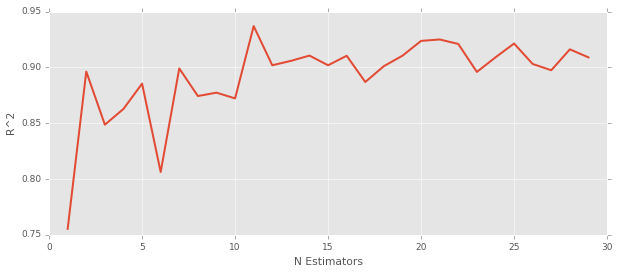

In [38]:
mpl.rcParams["figure.figsize"] = (10,4)
plt.plot(number_estimators_list,R2_rf_list_2,lw=2)
plt.xlabel("N Estimators")
plt.ylabel("R^2")

##In conclusion want roughly ~ 5+ estimators (10 is ok), and max_depth >= 7.

In [72]:
#Repeat from before, but with n = 10 and max_depth = 7
clf_rf = ensemble.RandomForestRegressor(n_estimators=10,max_depth=7,verbose=1)
clf_rf.fit(X_,np.ravel(np.array(y_)))
yfit_rf = clf_rf.predict(X_)
R2_rf = clf_rf.score(X_,np.ravel(np.array(y_)))
print "R2 Random Forest = ",R2_rf

R2 Random Forest =  0.874664463974


[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [73]:
dx_rf = np.ravel(np.array(y_)) - yfit_rf
zip(clf_rf.feature_importances_,pred_features)

[(0.037937219131229563, 'pop_density'),
 (0.014530033222790858, 'STATION_DISTANCE'),
 (0.011605827908721691, 'hhmedian'),
 (0.034575557773210697, 'median_owned'),
 (0.010899601616636063, 'median_rent'),
 (0.035879961859302825, 'pop_asian'),
 (0.0086695353844096212, 'pop_black'),
 (0.042834830109647261, 'pop_indpak'),
 (0.021782878977522895, 'pop_latino'),
 (0.022550916289433273, 'pop_total'),
 (0.10658047526518269, 'pop_white'),
 (0.28412732105292193, 'transient_pop'),
 (0.26905976102873097, 'transient_residential_pop'),
 (0.018568975786791724, 'fraction_asian'),
 (0.080397104593467966, 'fraction_latino')]

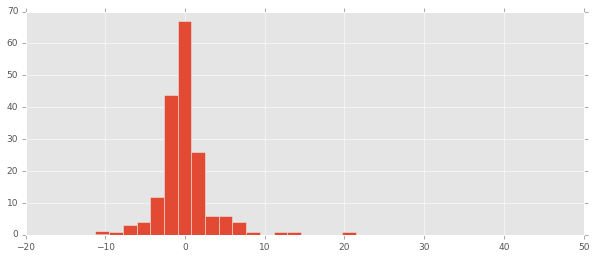

In [74]:
plt.hist(dx_rf,bins=bins);

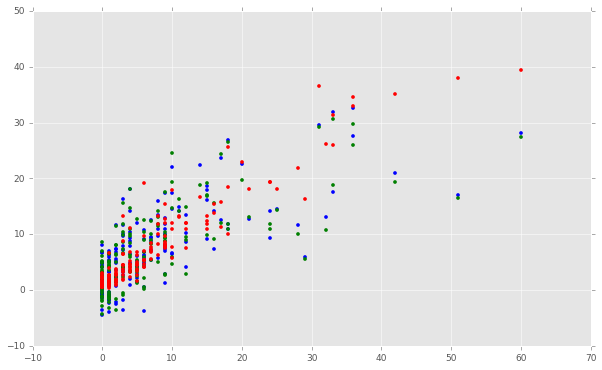

In [75]:
#Plot true vs predicted for the four models
mpl.rcParams["figure.figsize"] = (10,6)
plt.scatter(y_,yfit_linear,s=10,color="blue")
plt.scatter(y_,yfit_lasso,s=10,color="green")
plt.scatter(y_,yfit_rf,s=10,color="red")

In [76]:
dx_linear = np.ravel(y_)-yfit_linear
dx_lasso = np.ravel(y_)-yfit_lasso
dx_ridge = np.ravel(y_)-yfit_ridge
dx_lassolars = np.ravel(y_)-yfit_lassolars
dx_rf = np.ravel(y_) - yfit_rf

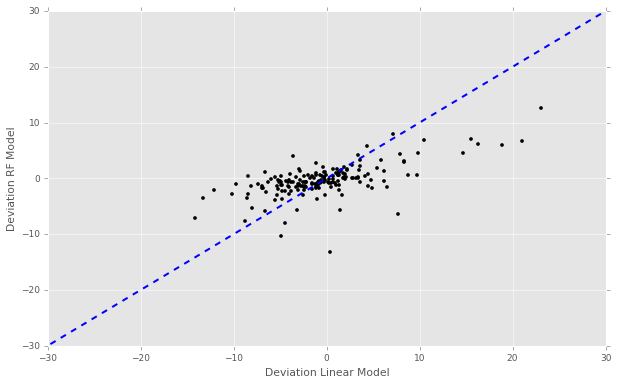

In [77]:
plt.scatter(dx_linear,dx_rf,s=10,color="black")
plt.plot([-100,100],[-100,100],lw=2,ls="--",color="blue")
plt.axis([-30,30,-30,30])
plt.xlabel("Deviation Linear Model")
plt.ylabel("Deviation RF Model")

# Restaurants per Capita

(array([  1.,   6.,  15.,  10.,   7.,   5.,   7.,   7.,   5.,   5.,  14.,
          4.,   6.,   5.,   2.,   3.,   4.,   2.,   0.,   1.,   3.,   3.,
          0.,   2.,   2.,   3.,   3.,   0.,   1.,   1.,   2.,   1.,   1.,
          1.,   3.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8

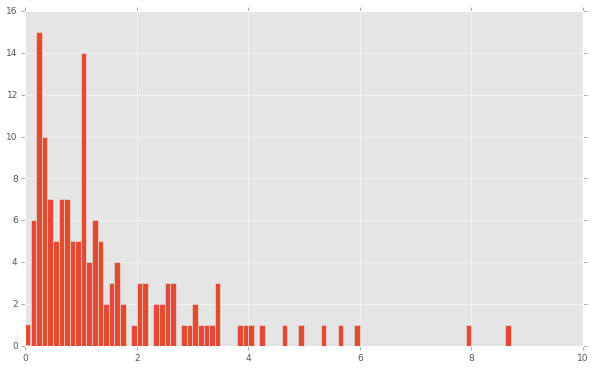

In [78]:
df0 = df[df['number_restaurants_capita_mexican'] > 0.0]
plt.hist(np.array(df0['number_restaurants_capita_mexican']),bins=np.arange(0,10,0.1))

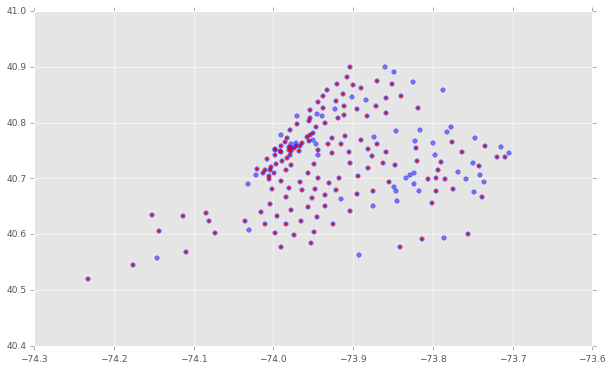

In [79]:
df0 = df[df['number_restaurants_capita_mexican'] > 0.0]
plt.scatter(df["INTPTLONG"],df["INTPTLAT"],s=20,color="blue",alpha=0.5)
plt.scatter(df0["INTPTLONG"],df0["INTPTLAT"],s=5,color="red")

In [80]:
#sort zipcodes by those with few restaurants
dfsort = df0.sort(columns="number_restaurants_capita_mexican", axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [81]:
dfsort.head(20)[['transient_residential_pop','pop_total','number_restaurants_mexican','number_restaurants']]

,transient_residential_pop,pop_total,number_restaurants_mexican,number_restaurants
ZIPCODE,,,,
11233,104734.371769,77775,1,18
11207,94333.062585,75225,1,19
11213,78928.421429,51342,1,10
11434,72350.000000,72350,1,19
11210,69430.654365,48725,1,14
11203,66937.983107,58321,1,11
11691,61336.142857,54188,1,11
10452,97683.984524,79568,2,34
10465,48393.333333,46448,1,17


## Rank order suggestions 

In [83]:
df

,ALAND,ALAND_SQMI,AWATER,AWATER_SQMI,BOROUGH,FRAC_LAND,GEOID,INTPTLAT,INTPTLONG,LATMAX,...,zillow_house_median,fraction_latino,fraction_asian,fraction_white,fraction_black,pop_density,number_restaurants,number_restaurants_capita,number_restaurants_capita_chinese,number_restaurants_capita_mexican
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
10001,346238,0.133,0,0.000,Manhattan,1.000000,72122017100,40.747402,-73.990328,81.498550,...,0,0.042111,0.265458,0.660092,0.032161,0.043566,76,50.384036,4.640635,5.303583
10002,2063151,0.797,1249217,0.482,Manhattan,0.622863,468793019212,40.715444,-73.984217,529.328659,...,0,0.287305,0.387337,0.345783,0.080577,0.056028,172,14.879661,3.892935,1.297645
10003,1097625,0.424,0,0.000,Manhattan,1.000000,288488038102,40.730343,-73.989634,325.855934,...,0,0.076578,0.139669,0.760993,0.048017,0.096014,268,25.430067,1.613101,3.131314
10004,900201,0.347,3296589,1.273,Manhattan,0.214498,72122000600,40.690181,-74.032017,81.390762,...,0,NaN,NaN,NaN,NaN,0.000000,2,0.000000,0.000000,0.000000
10005,336658,0.130,422042,0.163,Manhattan,0.443730,36061000900,40.698676,-74.006157,40.702598,...,0,0.118421,0.070175,0.801754,0.022807,0.043876,2,1.353978,0.000000,0.676989
10007,312722,0.121,0,0.000,Manhattan,1.000000,36061001300,40.709109,-74.012980,40.711627,...,0,0.091367,0.163930,0.742055,0.044756,0.018528,31,53.502965,10.355413,8.629510
10009,1625274,0.627,1072262,0.414,Manhattan,0.602503,360610028607,40.724099,-73.977759,407.262230,...,0,0.257295,0.153121,0.593852,0.073497,0.046876,131,17.194780,1.050063,2.100126
10010,811896,0.314,309253,0.119,Manhattan,0.724164,180305028400,40.736977,-73.983480,203.695318,...,0,0.061529,0.144889,0.765333,0.024960,0.112246,134,14.703900,0.987575,1.645959
10011,1209654,0.467,0,0.000,Manhattan,1.000000,252427055800,40.741678,-73.997865,285.204850,...,0,0.129654,0.082395,0.779576,0.056137,0.061794,136,18.194177,1.739149,2.408053


In [84]:
len(dfsub), len(y_)
dfsub['number_restaurants_mexican']

ZIPCODE
10001     8
10002    15
10003    33
10007     5
10009    16
10010    15
10011    18
10012    21
10013    10
10014    24
10016    25
10018     9
10019    18
10021     1
10022    11
10023    10
10024     6
10025    12
10026     2
10027     2
10028     3
10029    24
10030     0
10031     4
10032    16
10033     3
10034    10
10035    29
10036    36
10037     0
         ..
11379     1
11385    17
11411     0
11412     0
11413     0
11414     0
11415     0
11416     0
11417     0
11418     0
11419     0
11420     0
11421     4
11422     1
11423     0
11424     0
11426     1
11427     0
11428     1
11429     0
11430     6
11432     3
11433     2
11434     1
11435     9
11436     1
11451     1
11691     1
11692     0
11693     1
Name: number_restaurants_mexican, dtype: int64

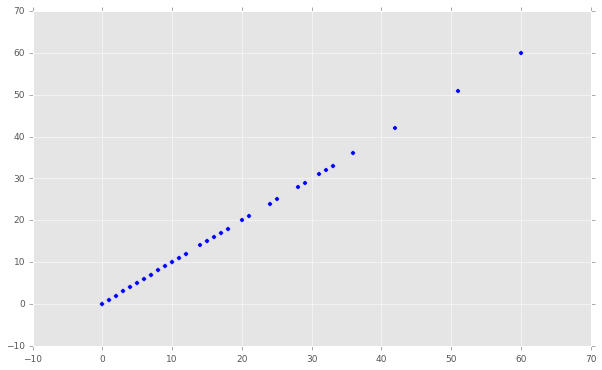

In [86]:
plt.scatter(np.array(dfsub['number_restaurants_mexican']),np.ravel(y_))

In [94]:
df['ZIPCODE']

ZIPCODE
10001     20002
10002    130026
10003     80024
10004     20008
10005     10005
10007     10007
10009    100090
10010     50050
10011     70077
10012     50060
10013     50065
10014     90126
10016     80128
10017     40068
10018     30054
10019     60114
10021     20042
10022     60132
10023     50115
10024     80192
10025    100250
10026     80208
10027    100270
10028     40112
10029    100290
10030     40120
10031    100310
10032    100320
10033     60198
10034     60204
          ...  
11412    182592
11413    114130
11414     45656
11415     11415
11416     91328
11417    114170
11418    171270
11419    159866
11420    216980
11421    182736
11422    137064
11423     91384
11424     11424
11425     11425
11426     45704
11427     79989
11428    125708
11429    137148
11430     22860
11432    194344
11433     80031
11434    240114
11435    228700
11436    114360
11451     11451
11691    105219
11692     58460
11693     35079
11694     70164
11697     35091
Name: ZIPCODE, d